In [ ]:
!pip install pandas

In [ ]:
# Pandas is used for data manipulation
import pandas as pd

# Read in data as pandas dataframe and display first 5 rows
features = pd.read_csv('dataOpgeschoond.csv')
features = features.drop('filename', axis = 1)
features.head(5)

#### LABEL: 1 = d , 2 = n, 3 = h , 4 = l , 5 = v . Zijn de pathologien ####


,chroma_stft,rmse,spectral_centroid,spectral_bandwidth,rolloff,zero_crossing_rate,mfcc1,mfcc2,mfcc3,mfcc4,mfcc5,mfcc6,mfcc7,mfcc8,mfcc9,mfcc10,mfcc11,mfcc12,mfcc13,mfcc14,mfcc15,mfcc16,mfcc17,mfcc18,mfcc19,mfcc20,label
0,0.419633,0.095655,1537.442135,1628.137979,3099.147927,0.080250,-224.261385,121.088910,-1.570818,38.405766,7.668504,10.866957,-5.146044,7.563354,-6.746391,-0.539529,-7.115730,0.184359,8.679809,-9.862980,6.414986,1.919067,0.831413,-3.646837,0.748623,-4.384379,1
1,0.352760,0.018845,1672.383570,1544.690236,3134.562309,0.094519,-405.923205,117.556817,-10.279452,45.740663,-11.094676,-1.837186,-8.650214,6.251371,-3.190804,-3.402297,-6.878911,-1.511848,2.314993,-12.027092,6.769019,-7.428666,-5.412683,2.915846,-2.763386,-2.014736,1
2,0.317260,0.029082,1290.155794,1460.483360,2590.076005,0.056209,-394.862418,125.876800,-10.512801,13.580368,-11.759638,-10.444103,-11.187638,6.174886,-10.376558,-5.824416,-4.779201,-7.327223,2.226211,-8.116371,-0.418128,-4.623411,0.454670,-0.958913,1.424755,9.064602,1
3,0.302911,0.022258,1779.578909,1711.307667,3508.353061,0.098209,-337.116065,105.902934,-19.128728,35.868275,-5.735588,4.239245,-17.992974,-8.791254,-12.250848,-2.450204,1.576103,-4.706963,-3.587647,-6.038598,6.289722,-2.317547,-0.981586,-5.469565,3.623864,-0.802028,1
4,0.441412,0.079167,1185.113976,1504.210235,2470.151730,0.053302,-334.580900,120.216620,35.188388,21.115279,-15.823903,-11.458211,-5.176840,-0.090277,4.312487,-0.298075,-1.434714,-0.956391,-1.843445,0.433331,4.668803,-2.616337,-0.154728,2.976677,-2.099184,-0.787404,1


In [ ]:
## print the amount of data. features.shape = (number of rows, number of columns.)
print('The shape of our features is:', features.shape)
# print summary statistics for each column to spot any anomolies or missing data
features.describe()

The shape of our features is: (194, 27)


,chroma_stft,rmse,spectral_centroid,spectral_bandwidth,rolloff,zero_crossing_rate,mfcc1,mfcc2,mfcc3,mfcc4,mfcc5,mfcc6,mfcc7,mfcc8,mfcc9,mfcc10,mfcc11,mfcc12,mfcc13,mfcc14,mfcc15,mfcc16,mfcc17,mfcc18,mfcc19,mfcc20,label
count,194.000000,194.000000,194.000000,194.000000,194.000000,194.000000,194.000000,194.000000,194.000000,194.000000,194.000000,194.000000,194.000000,194.000000,194.000000,194.000000,194.000000,194.000000,194.000000,194.000000,194.000000,194.000000,194.000000,194.000000,194.000000,194.000000,194.000000
mean,0.399802,0.042629,1587.251249,1681.015580,3267.054227,0.074699,-351.093116,111.055662,-5.642505,38.592111,-4.993401,6.813506,-10.265291,0.743970,-8.501067,0.975593,-1.234208,-4.546232,3.241973,-6.372514,5.082730,-5.403393,0.221574,-0.745423,-0.172550,-0.346126,2.061856
std,0.054000,0.035035,298.778768,168.351702,582.190406,0.025182,59.320890,17.192918,16.618537,12.667490,10.487205,10.441249,7.832262,7.315269,5.460874,4.522115,4.698067,3.966593,4.333239,4.340235,4.489977,4.196222,4.281291,3.190601,3.156967,4.093026,1.036279
min,0.290601,0.005375,1052.794856,1363.914621,2169.453548,0.027892,-508.605303,60.225501,-67.969429,-2.866396,-30.487328,-24.070507,-36.435312,-18.154538,-26.652792,-13.677716,-12.254006,-16.497470,-8.957103,-19.569922,-8.136802,-15.930112,-8.220355,-9.083312,-8.265202,-7.773803,1.000000
25%,0.357296,0.019401,1373.514181,1561.681196,2866.211835,0.058938,-391.959892,100.672818,-16.725526,30.339949,-11.759638,0.110454,-15.811538,-3.689158,-11.520802,-2.262591,-4.669880,-6.896323,0.444503,-9.483368,1.805560,-8.204025,-2.841185,-2.948325,-2.200891,-2.887600,1.000000
50%,0.403616,0.029790,1542.754051,1657.270905,3183.955747,0.069365,-359.158259,113.023816,-5.143213,38.924635,-4.843928,6.095922,-9.605435,-0.169270,-7.996117,1.014168,-1.707964,-4.591496,3.106520,-6.180078,4.918851,-4.971027,-0.129220,-0.996352,-0.237137,-1.234094,2.000000
75%,0.434126,0.056821,1736.154348,1783.408685,3628.051308,0.088460,-313.393623,122.642878,4.699403,47.955380,3.112273,12.788094,-5.083826,6.232250,-4.904429,4.842797,1.486145,-1.862435,6.644120,-3.591542,8.133277,-2.332622,2.662231,1.615185,1.682582,1.756922,2.000000
max,0.558558,0.215828,2703.179320,2141.562588,5308.284568,0.173772,-185.238352,152.115144,36.028808,76.969661,20.106426,32.750004,9.372186,20.790079,8.630891,10.719122,16.751359,5.589539,13.932120,4.115695,16.214827,6.295963,15.506280,8.002700,8.398640,16.074244,5.000000


In [ ]:
# One-hot encode categorical features
## wijzigt alle velden naar getallen (niets ons geval - csv zelf genormaliseerd) zodat het algoritme er mee kan werken.
#features = pd.get_dummies(features)
features.head(10)
features.describe()

,chroma_stft,rmse,spectral_centroid,spectral_bandwidth,rolloff,zero_crossing_rate,mfcc1,mfcc2,mfcc3,mfcc4,mfcc5,mfcc6,mfcc7,mfcc8,mfcc9,mfcc10,mfcc11,mfcc12,mfcc13,mfcc14,mfcc15,mfcc16,mfcc17,mfcc18,mfcc19,mfcc20,label
count,194.000000,194.000000,194.000000,194.000000,194.000000,194.000000,194.000000,194.000000,194.000000,194.000000,194.000000,194.000000,194.000000,194.000000,194.000000,194.000000,194.000000,194.000000,194.000000,194.000000,194.000000,194.000000,194.000000,194.000000,194.000000,194.000000,194.000000
mean,0.399802,0.042629,1587.251249,1681.015580,3267.054227,0.074699,-351.093116,111.055662,-5.642505,38.592111,-4.993401,6.813506,-10.265291,0.743970,-8.501067,0.975593,-1.234208,-4.546232,3.241973,-6.372514,5.082730,-5.403393,0.221574,-0.745423,-0.172550,-0.346126,2.061856
std,0.054000,0.035035,298.778768,168.351702,582.190406,0.025182,59.320890,17.192918,16.618537,12.667490,10.487205,10.441249,7.832262,7.315269,5.460874,4.522115,4.698067,3.966593,4.333239,4.340235,4.489977,4.196222,4.281291,3.190601,3.156967,4.093026,1.036279
min,0.290601,0.005375,1052.794856,1363.914621,2169.453548,0.027892,-508.605303,60.225501,-67.969429,-2.866396,-30.487328,-24.070507,-36.435312,-18.154538,-26.652792,-13.677716,-12.254006,-16.497470,-8.957103,-19.569922,-8.136802,-15.930112,-8.220355,-9.083312,-8.265202,-7.773803,1.000000
25%,0.357296,0.019401,1373.514181,1561.681196,2866.211835,0.058938,-391.959892,100.672818,-16.725526,30.339949,-11.759638,0.110454,-15.811538,-3.689158,-11.520802,-2.262591,-4.669880,-6.896323,0.444503,-9.483368,1.805560,-8.204025,-2.841185,-2.948325,-2.200891,-2.887600,1.000000
50%,0.403616,0.029790,1542.754051,1657.270905,3183.955747,0.069365,-359.158259,113.023816,-5.143213,38.924635,-4.843928,6.095922,-9.605435,-0.169270,-7.996117,1.014168,-1.707964,-4.591496,3.106520,-6.180078,4.918851,-4.971027,-0.129220,-0.996352,-0.237137,-1.234094,2.000000
75%,0.434126,0.056821,1736.154348,1783.408685,3628.051308,0.088460,-313.393623,122.642878,4.699403,47.955380,3.112273,12.788094,-5.083826,6.232250,-4.904429,4.842797,1.486145,-1.862435,6.644120,-3.591542,8.133277,-2.332622,2.662231,1.615185,1.682582,1.756922,2.000000
max,0.558558,0.215828,2703.179320,2141.562588,5308.284568,0.173772,-185.238352,152.115144,36.028808,76.969661,20.106426,32.750004,9.372186,20.790079,8.630891,10.719122,16.751359,5.589539,13.932120,4.115695,16.214827,6.295963,15.506280,8.002700,8.398640,16.074244,5.000000


In [ ]:
print('Shape of features after one-hot encoding:', features.shape)

Shape of features after one-hot encoding: (194, 27)


In [ ]:
# Use numpy to convert to arrays
import numpy as np

# Labels are the values we want to predict
labels = np.array(features['label'])

# Remove the labels from the features
# axis 1 refers to the columns
features = features.drop('label', axis = 1)

# Saving feature names for later use
feature_list = list(features.columns)

# Convert to numpy array
features = np.array(features)

In [ ]:
# Using Skicit-learn to split data into training and testing sets
from sklearn.model_selection import train_test_split

# Split the data into training and testing sets
train_features, test_features, train_labels, test_labels = train_test_split(features, labels, test_size = 0.25)

In [ ]:
print('Training Features Shape:', train_features.shape)
print('Training Labels Shape:', train_labels.shape)
print('Testing Features Shape:', test_features.shape)
print('Testing Labels Shape:', test_labels.shape)
print("train labels:", train_labels)
print("test labels:", test_labels)

Training Features Shape: (145, 26)
Training Labels Shape: (145,)
Testing Features Shape: (49, 26)
Testing Labels Shape: (49,)
train labels: [2 5 4 1 1 2 2 1 2 1 2 1 5 2 2 1 1 2 1 2 2 1 2 1 2 3 3 2 2 2 1 2 2 2 2 2 1
 3 1 1 2 1 4 4 2 1 2 1 3 2 1 2 2 4 1 1 1 1 2 2 3 1 4 3 2 1 2 3 2 1 4 3 2 2
 1 1 1 2 1 3 3 1 1 5 4 1 1 2 2 3 2 1 1 3 2 3 1 1 3 3 2 2 1 2 2 3 1 1 1 1 5
 2 3 2 2 1 3 2 2 2 4 2 2 4 3 4 2 3 2 1 2 2 1 2 1 1 2 1 1 2 2 2 2 3 1]
test labels: [2 1 1 2 4 2 2 2 4 2 1 3 1 1 4 2 2 2 2 2 4 5 1 4 2 1 1 3 1 2 1 2 2 1 2 2 2
 4 2 1 1 1 3 2 2 3 5 2 3]


In [ ]:
# Import the model we are using
from sklearn.ensemble import RandomForestRegressor

# Instantiate model 
rf = RandomForestRegressor(n_estimators= 1000, random_state=42)

# Train the model on training data
model = rf.fit(train_features, train_labels);

In [ ]:
rf_new = RandomForestRegressor(n_estimators = 100, criterion = 'entropy', max_depth = None, 
                               min_samples_split = 2, min_samples_leaf = 1)

In [ ]:
# Use the forest's predict method on the test data
predictions = rf.predict(test_features)

# Calculate the absolute errors
errors = abs(predictions - test_labels)

# Print out the mean absolute error (mae)
print('Mean Absolute Error:', round(np.mean(errors), 2), '.')
print(errors)
print(test_labels)

Mean Absolute Error: 0.62 .
[0.181 0.792 0.357 0.028 1.763 0.105 0.093 0.454 0.207 0.079 0.857 0.949
 1.518 0.507 1.54  0.208 0.091 0.219 0.944 0.168 0.032 3.402 0.507 1.042
 0.011 0.34  0.355 1.394 1.049 0.205 0.325 0.083 0.794 1.02  0.269 0.059
 0.076 1.864 0.12  0.293 1.076 0.392 0.908 0.177 0.023 1.307 1.655 0.194
 0.557]
[2 1 1 2 4 2 2 2 4 2 1 3 1 1 4 2 2 2 2 2 4 5 1 4 2 1 1 3 1 2 1 2 2 1 2 2 2
 4 2 1 1 1 3 2 2 3 5 2 3]


In [ ]:
# Calculate mean absolute percentage error (MAPE)

mape = 100 * (errors / test_labels)

# Calculate and display accuracy
accuracy = 100 - np.mean(mape)
print('Accuracy:', round(accuracy, 2), '%.')

Accuracy: 67.33 %.


In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
import numpy as np

clf = RandomForestClassifier() #Initialize with whatever parameters you want to

# 10-Fold Cross validation
print (cross_val_predict(clf, features, labels, cv=5))
predictions = (cross_val_predict(clf, features, labels, cv=5))

print (cross_val_score(clf, features, labels, cv=5))

accuracy = metrics.r2_score(labels, predictions)
print ('Cross-Predicted Accuracy:', accuracy)

# Calculate the absolute errors
errors = abs(predictions - labels)

# Print out the mean absolute error (mae)
print('Mean Absolute Error:', round(np.mean(errors), 2), '.')

# Calculate mean absolute percentage error (MAPE)

mape = 100 * (errors / labels)

# Calculate and display accuracy
accuracy = 100 - np.mean(mape)
print('Accuracy:', round(accuracy, 2), '%.')

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 1 2 1 2 3 2 1 2 2 1 1 1 2 2 2 1 2 1 2 2 3
 2 1 2 2 1 1 1 1 2 2 2 2 2 1 2 2 1 1 1 1 2 1 1 1 1 1 2 1 1 2 1 1 1 4 1 1 1
 1 2 4 2 4 4 2 4 2 4 4 1 4 3 2 4 4 1 2 2 2 1 2 2 2 2 2 1 2 1 2 2 2 2 2 2 2
 1 1 2 2 2 2 2 2 2 2 1 2 2 2 2 4 2 2 2 2 2 2 2 2 2 2 2 2 1 2 2 2 2 2 2 2 2
 2 1 2 2 2 2 2 2 2 2 1 2 4 2 2 1 2 2 1 1 2 1 2 2 2 2 1 2 2 2 2 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1]
[0.66666667 0.58974359 0.53846154 0.53846154 0.65789474]
Cross-Predicted Accuracy: -0.027705929168324817
Mean Absolute Error: 0.59 .
Accuracy: 73.4 %.


In [ ]:
# Necessary imports:
from sklearn.model_selection import cross_val_score, cross_val_predict
from sklearn import metrics

# Perform 6-fold cross validation
scores = cross_val_score(model, features, labels, cv=6)
print ('Cross-validated scores:', scores)

predictions = cross_val_predict(model, features, labels, cv=6)

accuracy = metrics.r2_score(labels, predictions)
print ('Cross-Predicted Accuracy:', accuracy)


Cross-validated scores: [ 0.         -0.03534976 -2.24803703  0.          0.          0.13489121]
Cross-Predicted Accuracy: 0.017329148229207947


In [ ]:
# Import tools needed for visualization
from sklearn.tree import export_graphviz
import pydot


# Pull out one tree from the forest
tree = rf.estimators_[5]

# Export the image to a dot file
export_graphviz(tree, out_file = 'tree.dot', feature_names = feature_list, rounded = True, precision = 1)

# Use dot file to create a graph
(graph, ) = pydot.graph_from_dot_file('tree.dot')

# Write graph to a png file
graph.write_png('tree.png'); 

In [ ]:
print('The depth of this tree is:', tree.tree_.max_depth)

The depth of this tree is: 11


In [ ]:
# Limit depth of tree to 2 levels
rf_small = RandomForestRegressor(n_estimators=10, max_depth = 3, random_state=42)
rf_small.fit(train_features, train_labels)

# Extract the small tree
tree_small = rf_small.estimators_[5]

# Save the tree as a png image
export_graphviz(tree_small, out_file = 'small_tree.dot', feature_names = feature_list, rounded = True, precision = 1)

(graph, ) = pydot.graph_from_dot_file('small_tree.dot')

graph.write_png('small_tree.png')

In [ ]:
# Get numerical feature importances
importances = list(rf.feature_importances_)

# List of tuples with variable and importance
feature_importances = [(feature, round(importance, 2)) for feature, importance in zip(feature_list, importances)]

# Sort the feature importances by most important first
feature_importances = sorted(feature_importances, key = lambda x: x[1], reverse = True)

# Print out the feature and importances 
[print('Variable: {:20} Importance: {}'.format(*pair)) for pair in feature_importances];

Variable: mfcc20               Importance: 0.14
Variable: spectral_centroid    Importance: 0.13
Variable: mfcc8                Importance: 0.09
Variable: chroma_stft          Importance: 0.04
Variable: mfcc3                Importance: 0.04
Variable: mfcc4                Importance: 0.04
Variable: mfcc5                Importance: 0.04
Variable: mfcc7                Importance: 0.04
Variable: mfcc15               Importance: 0.04
Variable: mfcc17               Importance: 0.04
Variable: zero_crossing_rate   Importance: 0.03
Variable: mfcc2                Importance: 0.03
Variable: mfcc9                Importance: 0.03
Variable: mfcc12               Importance: 0.03
Variable: mfcc18               Importance: 0.03
Variable: rmse                 Importance: 0.02
Variable: spectral_bandwidth   Importance: 0.02
Variable: rolloff              Importance: 0.02
Variable: mfcc1                Importance: 0.02
Variable: mfcc6                Importance: 0.02
Variable: mfcc10               Importanc

The spectral centroid is a measure used in digital signal processing to characterise a spectrum. It indicates where the "center of mass" of the spectrum is located. Perceptually, it has a robust connection with the impression of "brightness" of a sound. = timbre

In [ ]:
# New random forest with only the two most important variables
rf_most_important = RandomForestRegressor(n_estimators= 1000, random_state=42)

# Extract the two most important features
important_indices = [feature_list.index('spectral_centroid'), feature_list.index('mfcc8'), feature_list.index('mfcc20')]
train_important = train_features[:, important_indices]
test_important = test_features[:, important_indices]

# Train the random forest
rf_most_important.fit(train_important, train_labels)

# Make predictions and determine the error
predictions = rf_most_important.predict(test_important)

errors = abs(predictions - test_labels)

# Display the performance metrics
print('Mean Absolute Error:', round(np.mean(errors), 2), 'degrees.')

mape = np.mean(100 * (errors / test_labels))
accuracy = 100 - mape

print('Accuracy:', round(accuracy, 2), '%.')

Mean Absolute Error: 0.68 degrees.
Accuracy: 66.19 %.


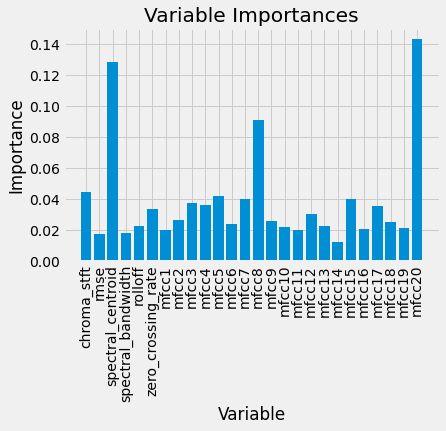

In [ ]:
# Import matplotlib for plotting and use magic command for Jupyter Notebooks
import matplotlib.pyplot as plt

%matplotlib inline

# Set the style
plt.style.use('fivethirtyeight')

# list of x locations for plotting
x_values = list(range(len(importances)))

# Make a bar chart
plt.bar(x_values, importances, orientation = 'vertical')

# Tick labels for x axis
plt.xticks(x_values, feature_list, rotation='vertical')

# Axis labels and title
plt.ylabel('Importance'); plt.xlabel('Variable'); plt.title('Variable Importances'); 